**ETUDE DE SANTE PUBLIQUE**

**1. Proportion de personnes en état de sous-nutrition dans le monde**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
population = pd.read_csv('population.csv')
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


+ Je fais un filtre sur la table population pour l'année 2017
+ Je calcule la population mondiale pour 2017

In [3]:
population_2017 = population.loc[population['Année'] == 2017]
total_population_2017 = round(population_2017['Valeur'].sum()) * 1000
print("La population mondiale en 2017 est de", total_population_2017,"habitants")

La population mondiale en 2017 est de 7548134000 habitants


In [4]:
sous_nutrition = pd.read_csv('sous_nutrition.csv')
print(sous_nutrition)

             Zone      Année Valeur
0     Afghanistan  2012-2014    8.6
1     Afghanistan  2013-2015    8.8
2     Afghanistan  2014-2016    8.9
3     Afghanistan  2015-2017    9.7
4     Afghanistan  2016-2018   10.5
...           ...        ...    ...
1213     Zimbabwe  2013-2015    NaN
1214     Zimbabwe  2014-2016    NaN
1215     Zimbabwe  2015-2017    NaN
1216     Zimbabwe  2016-2018    NaN
1217     Zimbabwe  2017-2019    NaN

[1218 rows x 3 columns]


Je remplace les NaN par des 0

In [5]:
df = pd.DataFrame(sous_nutrition)
NaN_replaced_sous_nutrition = df.replace(np.NaN,0)
print(NaN_replaced_sous_nutrition)

             Zone      Année Valeur
0     Afghanistan  2012-2014    8.6
1     Afghanistan  2013-2015    8.8
2     Afghanistan  2014-2016    8.9
3     Afghanistan  2015-2017    9.7
4     Afghanistan  2016-2018   10.5
...           ...        ...    ...
1213     Zimbabwe  2013-2015      0
1214     Zimbabwe  2014-2016      0
1215     Zimbabwe  2015-2017      0
1216     Zimbabwe  2016-2018      0
1217     Zimbabwe  2017-2019      0

[1218 rows x 3 columns]


Ensuite je convertis ma colonne valeur au format numérique

In [6]:
NaN_replaced_sous_nutrition['Valeur'] = pd.to_numeric(NaN_replaced_sous_nutrition['Valeur'],errors = 'coerce')
print(NaN_replaced_sous_nutrition.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1218 non-null   object 
 1   Année   1218 non-null   object 
 2   Valeur  1098 non-null   float64
dtypes: float64(1), object(2)
memory usage: 28.7+ KB
None


+ Je fais un filtre des données de sous-nutrition pour l'année 2017
+ Je calcule le total de personnes sous-nutries pour l'année 2017

In [7]:
sous_nutrition_2017 = NaN_replaced_sous_nutrition.loc[NaN_replaced_sous_nutrition['Année'] == '2016-2018']
total_sous_nutrition_2017 = round(sous_nutrition_2017['Valeur'].sum())*1000000
print("Le total de personnes en sous nutrition en 2017 est de", total_sous_nutrition_2017)

Le total de personnes en sous nutrition en 2017 est de 536000000


Expression du nombre de personnes en état de sous-nutrition en pourcentage de la population mondiale

In [8]:
pourcentage_sous_nutrition = round(total_sous_nutrition_2017 / total_population_2017 * 100,2)
print("La proportion de personnes en sous nutrition dans le monde en 2017 est de", pourcentage_sous_nutrition,"%")

La proportion de personnes en sous nutrition dans le monde en 2017 est de 7.1 %


**2. Nombre théorique de personnes qui pourraient être nourries**

In [9]:
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


Calcul de la disponibilité alimentaire par pays (en kcal/personne/jour)

In [10]:
dispo_alimentaire_par_pays = dispo_alimentaire.groupby(['Zone'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum()  
dispo_alimentaire_par_pays.head()

Zone
Afghanistan       2087.0
Afrique du Sud    3020.0
Albanie           3188.0
Algérie           3293.0
Allemagne         3503.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

Jointure de la série avec le dataframe popualtion 2017

In [11]:
df_intermediaire = pd.merge(population_2017, dispo_alimentaire_par_pays, on = 'Zone')
df_intermediaire.head()

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,2087.0
1,Afrique du Sud,2017,57009.756,3020.0
2,Albanie,2017,2884.169,3188.0
3,Algérie,2017,41389.189,3293.0
4,Allemagne,2017,82658.409,3503.0


Calcul de la disponibilité alimentaire totale par pays 

In [12]:
df_intermediaire['disponibilite_alimentaire_total_pays'] = round(df_intermediaire['Disponibilité alimentaire (Kcal/personne/jour)']*df_intermediaire['Valeur'])
df_intermediaire.head()

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),disponibilite_alimentaire_total_pays
0,Afghanistan,2017,36296.113,2087.0,75749988.0
1,Afrique du Sud,2017,57009.756,3020.0,172169463.0
2,Albanie,2017,2884.169,3188.0,9194731.0
3,Algérie,2017,41389.189,3293.0,136294599.0
4,Allemagne,2017,82658.409,3503.0,289552407.0


In [13]:
dispo_alimentaire_mondiale = round(df_intermediaire['disponibilite_alimentaire_total_pays'].sum())
print("La disponibilité alimentaire mondiale est de", dispo_alimentaire_mondiale,"Kcal/jour" )

La disponibilité alimentaire mondiale est de 20918984629 Kcal/jour


En considérant que le besoin alimentaire moyen d'une personne est de 2500 kcal/jour

In [14]:
nombre_theorique_de_pers_qui_pourraient_etre_nourries = round(dispo_alimentaire_mondiale / 2500 *1000)
print("Le nombre théorique de personnes qui pourraient être nourries est de", nombre_theorique_de_pers_qui_pourraient_etre_nourries, "personnes.")

Le nombre théorique de personnes qui pourraient être nourries est de 8367593852 personnes.


In [15]:
pourcentage = round(nombre_theorique_de_pers_qui_pourraient_etre_nourries*100 / (population_2017['Valeur'].sum()*1000))
print("Cela représente", pourcentage, "% de la population mondiale." )

Cela représente 111 % de la population mondiale.


**3. Nombre théorique de personnes qui pourraient être nourries à partir des produits d'origine végétale**

In [16]:
dispo_alimentaire_vegetaux = dispo_alimentaire.loc[dispo_alimentaire['Origine'] =='vegetale',:]
dispo_alimentaire_vegetaux.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN


In [17]:
dispo_produits_vegetaux_par_pays = dispo_alimentaire_vegetaux.groupby(['Zone','Origine'])['Disponibilité alimentaire (Kcal/personne/jour)'].sum()  
dispo_produits_vegetaux_par_pays.head()

Zone            Origine 
Afghanistan     vegetale    1871.0
Afrique du Sud  vegetale    2533.0
Albanie         vegetale    2203.0
Algérie         vegetale    2915.0
Allemagne       vegetale    2461.0
Name: Disponibilité alimentaire (Kcal/personne/jour), dtype: float64

In [18]:
df_intermediaire2 = pd.merge(population_2017, dispo_produits_vegetaux_par_pays, on = 'Zone')
df_intermediaire2.head()

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,1871.0
1,Afrique du Sud,2017,57009.756,2533.0
2,Albanie,2017,2884.169,2203.0
3,Algérie,2017,41389.189,2915.0
4,Allemagne,2017,82658.409,2461.0


Calcul de la disponibilité alimentaire par pays, pour les produits végétaux

In [19]:
df_intermediaire2['disponibilite_alimentaire_produits_vegetaux'] = round(df_intermediaire2['Disponibilité alimentaire (Kcal/personne/jour)']*df_intermediaire['Valeur'])
df_intermediaire2.head()

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),disponibilite_alimentaire_produits_vegetaux
0,Afghanistan,2017,36296.113,1871.0,67910027.0
1,Afrique du Sud,2017,57009.756,2533.0,144405712.0
2,Albanie,2017,2884.169,2203.0,6353824.0
3,Algérie,2017,41389.189,2915.0,120649486.0
4,Allemagne,2017,82658.409,2461.0,203422345.0


In [20]:
dispo_alimentaire_mondiale_produits_vegetaux = round(df_intermediaire2['disponibilite_alimentaire_produits_vegetaux'].sum())
print("La disponibilité alimentaire mondiale pour les produits végétaux est de", dispo_alimentaire_mondiale_produits_vegetaux,"Kcal/jour" )

La disponibilité alimentaire mondiale pour les produits végétaux est de 17260764208 Kcal/jour


In [21]:
nombre_theorique_de_pers_qui_pourraient_etre_nourries_avec_des_vegetaux = round(dispo_alimentaire_mondiale_produits_vegetaux / 2500 *1000)
print("Le nombre théorique de personnes qui pourraient être nourries uniquement de produits d'origine végétale est de", nombre_theorique_de_pers_qui_pourraient_etre_nourries_avec_des_vegetaux , "personnes.")

Le nombre théorique de personnes qui pourraient être nourries uniquement de produits d'origine végétale est de 6904305683 personnes.


In [22]:
pourcentage = round( nombre_theorique_de_pers_qui_pourraient_etre_nourries_avec_des_vegetaux*100 / (population_2017['Valeur'].sum()*1000))
print("Cela représente", pourcentage, "% de la population mondiale." )

Cela représente 91 % de la population mondiale.


**4. Utilisation de la disponibilité intérieure (utilisation intérieure), en particulier la part qui est attribuée à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine**

Calcul de la disponibilité intérieure totale (mondiale)

In [23]:
disponibilite_interieure_somme = dispo_alimentaire['Disponibilité intérieure'].sum()
disponibilite_interieure_somme

9848994.0

Répartition en quantité (exprimée en milliers de tonnes) de la disponibilité intérieure totale par type d'utilisation

In [24]:
dispo_interieure_repartition = dispo_alimentaire[['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']].sum()
dispo_interieure_repartition

Aliments pour animaux    1304245.0
Autres Utilisations       865023.0
Nourriture               4876258.0
Pertes                    453698.0
Semences                  154681.0
Traitement               2204687.0
dtype: float64

Retranscription de la répartition de la disponibilité intérieure par type d'utilisation en pourcentages

In [25]:
dispo_interieure_repartition_pourcentages = round(dispo_alimentaire[['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement']].sum()/disponibilite_interieure_somme*100,2)
dispo_interieure_repartition_pourcentages

Aliments pour animaux    13.24
Autres Utilisations       8.78
Nourriture               49.51
Pertes                    4.61
Semences                  1.57
Traitement               22.38
dtype: float64

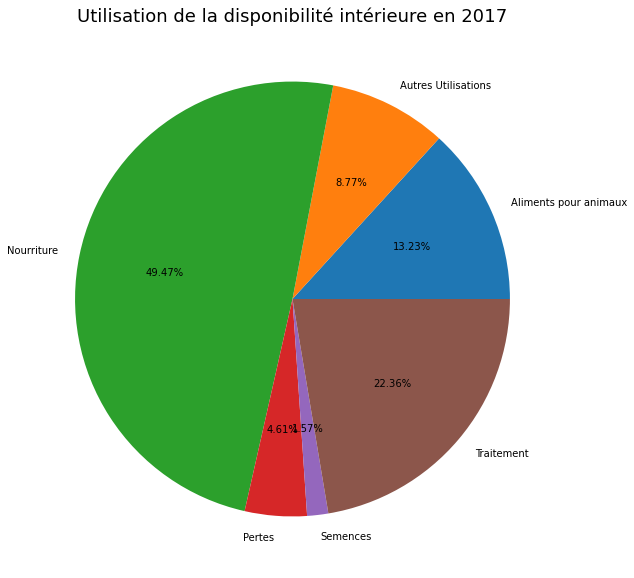

In [26]:
plt.figure(figsize = (10,10))
plt.title("Utilisation de la disponibilité intérieure en 2017", fontsize=18)
plt.pie(x=dispo_interieure_repartition_pourcentages,labels=['Aliments pour animaux','Autres Utilisations','Nourriture','Pertes','Semences','Traitement'],autopct='%.2f%%')
plt.show()

**5. Utilisation des céréales**

Import des données depuis le site FAOSTAT pour l'année 2017

In [27]:
utilisation_des_cereales = pd.read_csv('cereales.csv')
utilisation_des_cereales.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),1,Monde,5521,Aliments pour animaux,S2511,Blé et produits,2017,2017,Milliers de tonnes,124952,I,"Valeur imputée"""
1,FBS,Bilans Alimentaires (2010-),1,Monde,5527,Semences,S2511,Blé et produits,2017,2017,Milliers de tonnes,37880,I,"Valeur imputée"""
2,FBS,Bilans Alimentaires (2010-),1,Monde,5123,Pertes,S2511,Blé et produits,2017,2017,Milliers de tonnes,27380,I,"Valeur imputée"""
3,FBS,Bilans Alimentaires (2010-),1,Monde,5131,Traitement,S2511,Blé et produits,2017,2017,Milliers de tonnes,9999,I,"Valeur imputée"""
4,FBS,Bilans Alimentaires (2010-),1,Monde,5154,Autres utilisations (non alimentaire),S2511,Blé et produits,2017,2017,Milliers de tonnes,24922,I,"Valeur imputée"""


Répartition en quantité par type d'utilisation

In [28]:
utilisation_des_cereales_repartition = utilisation_des_cereales.groupby(['Élément'])['Valeur'].sum()
utilisation_des_cereales_repartition

Élément
Aliments pour animaux                     937088
Autres utilisations (non alimentaire)     279701
Nourriture                               1311797
Pertes                                    135552
Semences                                   80198
Traitement                                110301
Name: Valeur, dtype: int64

In [29]:
total_cereales = utilisation_des_cereales['Valeur'].sum()
total_cereales

2854637

Retranscription de la série précédente en pourcentages

In [30]:
utilisation_des_cereales_pourcentage = round(utilisation_des_cereales_repartition[['Aliments pour animaux','Autres utilisations (non alimentaire)','Nourriture','Pertes','Semences','Traitement']]/total_cereales*100,2)
utilisation_des_cereales_pourcentage

Élément
Aliments pour animaux                    32.83
Autres utilisations (non alimentaire)     9.80
Nourriture                               45.95
Pertes                                    4.75
Semences                                  2.81
Traitement                                3.86
Name: Valeur, dtype: float64

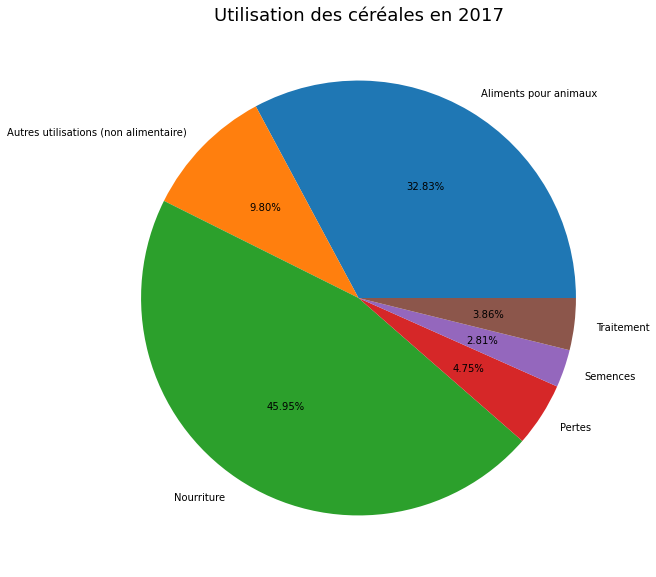

In [31]:
plt.figure(figsize = (10,10))
plt.title("Utilisation des céréales en 2017", fontsize=18)
plt.pie(x=utilisation_des_cereales_pourcentage,labels=['Aliments pour animaux','Autres utilisations (non alimentaire)','Nourriture','Pertes','Semences','Traitement'],autopct='%.2f%%')
plt.show()

Répartition par type de produit céréalier

In [32]:
cereales = utilisation_des_cereales.groupby(['Produit'])['Valeur'].sum()
cereales

Produit
Avoine                  25348
Blé et produits        732587
Céréales, Autres        31359
Maïs et produits      1109795
Millet et produits      28198
Orge et produits       142872
Riz et produits        713968
Seigle et produits      12675
Sorgho et produits      57835
Name: Valeur, dtype: int64

In [33]:
cereales_pourcentages = round(cereales[['Avoine','Blé et produits','Céréales, Autres','Maïs et produits','Millet et produits','Orge et produits','Riz et produits','Seigle et produits','Sorgho et produits']]/total_cereales*100,2)
cereales_pourcentages

Produit
Avoine                 0.89
Blé et produits       25.66
Céréales, Autres       1.10
Maïs et produits      38.88
Millet et produits     0.99
Orge et produits       5.00
Riz et produits       25.01
Seigle et produits     0.44
Sorgho et produits     2.03
Name: Valeur, dtype: float64

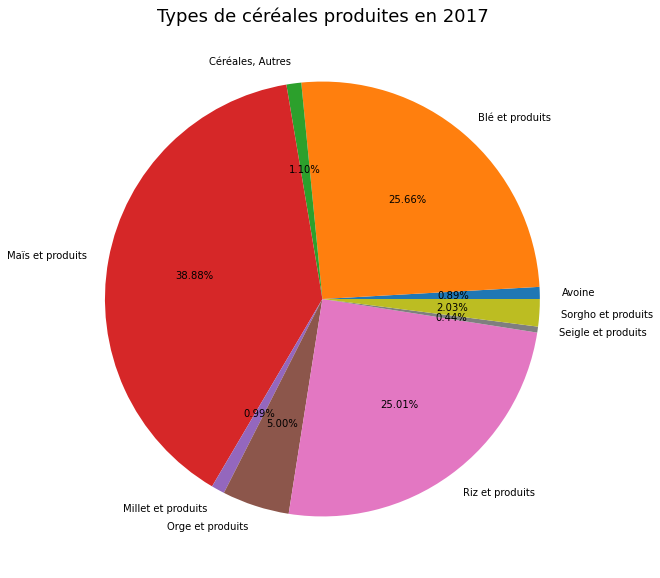

In [34]:
plt.figure(figsize = (10,10))
plt.title("Types de céréales produites en 2017", fontsize=18)
plt.pie(x=cereales_pourcentages,labels=['Avoine','Blé et produits','Céréales, Autres','Maïs et produits','Millet et produits','Orge et produits','Riz et produits','Seigle et produits','Sorgho et produits'],autopct='%.2f%%')
plt.show()

**6. Utilisation du manioc en Thaïlande**

Import des données depuis le site FAOSTAT

+ Disponibilité intérieure = Production + (Importations - Exportations) - variations de stock
+ Disponibilité intérieure = Nourriture(alimentation humaine) + Aliments pour animaux + traitements + Autres utilisations + résidus + pertes

In [35]:
manioc = pd.read_csv('manioc.csv')
manioc.head()

,Code Domaine,Domaine,Code zone (M49),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5511,Production,S2532,Manioc et produits,2017,2017,Milliers de tonnes,30495.0,I,Valeur imputée
1,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5611,Importations - Quantité,S2532,Manioc et produits,2017,2017,Milliers de tonnes,2355.0,I,Valeur imputée
2,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5072,Variation de stock,S2532,Manioc et produits,2017,2017,Milliers de tonnes,-1316.0,I,Valeur imputée
3,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5911,Exportations - Quantité,S2532,Manioc et produits,2017,2017,Milliers de tonnes,29409.0,I,Valeur imputée
4,FBS,Bilans Alimentaires (2010-),764,Thaïlande,5301,Disponibilité intérieure,S2532,Manioc et produits,2017,2017,Milliers de tonnes,4757.0,I,Valeur imputée


In [36]:
manioc = manioc.loc[:,['Élément','Valeur']]
manioc

,Élément,Valeur
0,Production,30495.00
1,Importations - Quantité,2355.00
2,Variation de stock,-1316.00
3,Exportations - Quantité,29409.00
4,Disponibilité intérieure,4757.00
5,Aliments pour animaux,1360.00
6,Pertes,2295.00
7,Traitement,0.00
8,Autres utilisations (non alimentaire),949.00
9,Résidus,0.00


In [37]:
production = manioc.iloc[0,1]
print("la production de manioc en thaïlande est de", production, "milliers de tonnes")

la production de manioc en thaïlande est de 30495.0 milliers de tonnes


In [38]:
manioc_vue = manioc.iloc[0:5,0:2]
manioc_vue

,Élément,Valeur
0,Production,30495.0
1,Importations - Quantité,2355.0
2,Variation de stock,-1316.0
3,Exportations - Quantité,29409.0
4,Disponibilité intérieure,4757.0


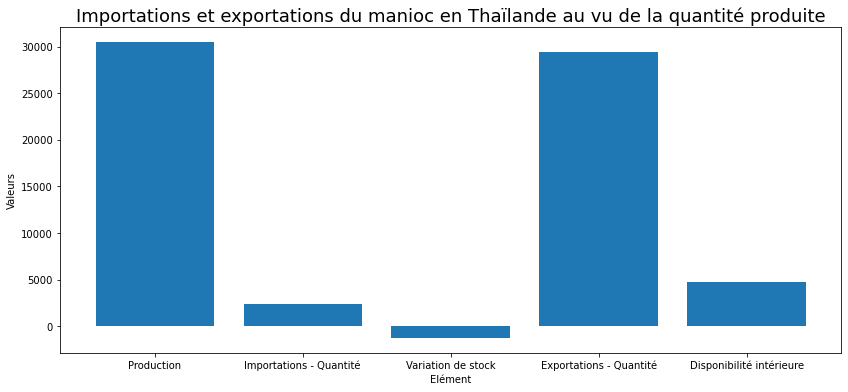

In [39]:
plt.figure(figsize = (14,6))
plt.xlabel("Elément")
plt.ylabel("Valeurs")
plt.title("Importations et exportations du manioc en Thaïlande au vu de la quantité produite", fontsize=18)
plt.bar(height= manioc_vue['Valeur'],x=manioc_vue['Élément'])
plt.show()

Nous pouvons conclure de ce graphique que la Thaïlande exporte pratiquement la totalité de la quantité de manioc produite dans le pays

Regardons maintenant comment la Thaïlande utilise sa disponibilité intérieure en manioc

In [40]:
manioc_vue_2 = manioc.iloc[5:11,0:2]
manioc_vue_2

,Élément,Valeur
5,Aliments pour animaux,1360.0
6,Pertes,2295.0
7,Traitement,0.0
8,Autres utilisations (non alimentaire),949.0
9,Résidus,0.0
10,Nourriture,153.0


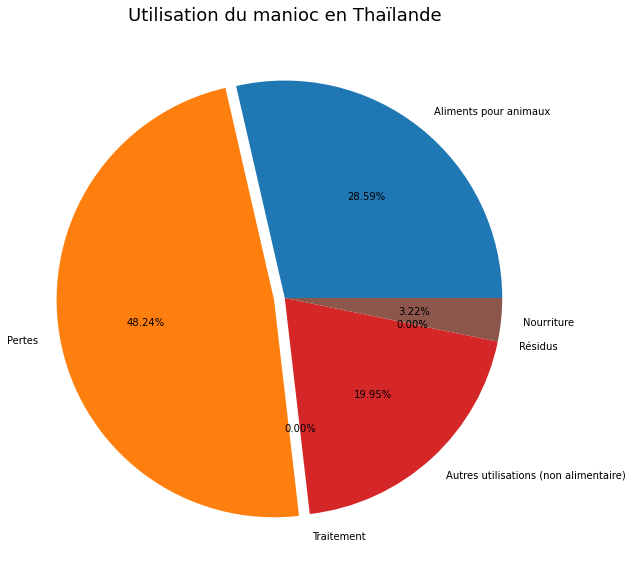

In [41]:
plt.figure(figsize = (10,10))
plt.title("Utilisation du manioc en Thaïlande", fontsize=18)
plt.pie(x=manioc_vue_2['Valeur'],labels=manioc_vue_2['Élément'],autopct='%.2f%%', explode=(0, 0.05, 0, 0, 0, 0))
plt.show()

La grande partie du manioc est utilisée pour l'alimentation animale. La Thaïlande perd la moitié de sa disponibilité intéreieure en manioc

**7. Sous-nutrition dans le monde**

Regardons le pourcentage de personnes en état de sous-nutrition dans les pays où la sous-nutrition est la plus marquée. 

In [42]:
df_sous_nutrition = pd.merge(population_2017, sous_nutrition_2017, on = 'Zone')
df_sous_nutrition

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2017,36296.113,2016-2018,10.5
1,Afrique du Sud,2017,57009.756,2016-2018,3.1
2,Albanie,2017,2884.169,2016-2018,0.1
3,Algérie,2017,41389.189,2016-2018,1.3
4,Allemagne,2017,82658.409,2016-2018,0.0
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,2016-2018,8.0
199,Viet Nam,2017,94600.648,2016-2018,6.5
200,Yémen,2017,27834.819,2016-2018,0.0
201,Zambie,2017,16853.599,2016-2018,0.0


In [43]:
df_sous_nutrition.rename(columns = {'Valeur_y':'personnes_sous_nutries'}, inplace=True)
df_sous_nutrition.rename(columns = {'Valeur_x': 'population'}, inplace=True)
df_sous_nutrition

,Zone,Année_x,population,Année_y,personnes_sous_nutries
0,Afghanistan,2017,36296.113,2016-2018,10.5
1,Afrique du Sud,2017,57009.756,2016-2018,3.1
2,Albanie,2017,2884.169,2016-2018,0.1
3,Algérie,2017,41389.189,2016-2018,1.3
4,Allemagne,2017,82658.409,2016-2018,0.0
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,2016-2018,8.0
199,Viet Nam,2017,94600.648,2016-2018,6.5
200,Yémen,2017,27834.819,2016-2018,0.0
201,Zambie,2017,16853.599,2016-2018,0.0


Calcul du pourcentage de personnes sous nutries par pays

In [44]:
df_sous_nutrition['pourcentage_personnes_sous_nutries'] = round(df_sous_nutrition['personnes_sous_nutries']*1000 / df_sous_nutrition['population'] * 100,2)
df_sous_nutrition.sort_values('pourcentage_personnes_sous_nutries',ascending=False).head(10)

,Zone,Année_x,population,Année_y,personnes_sous_nutries,pourcentage_personnes_sous_nutries
78,Haïti,2017,10982.366,2016-2018,5.3,48.26
157,République populaire démocratique de Corée,2017,25429.825,2016-2018,12.0,47.19
108,Madagascar,2017,25570.512,2016-2018,10.5,41.06
103,Libéria,2017,4702.226,2016-2018,1.8,38.28
100,Lesotho,2017,2091.534,2016-2018,0.8,38.25
183,Tchad,2017,15016.753,2016-2018,5.7,37.96
161,Rwanda,2017,11980.961,2016-2018,4.2,35.06
121,Mozambique,2017,28649.018,2016-2018,9.4,32.81
186,Timor-Leste,2017,1243.258,2016-2018,0.4,32.17
0,Afghanistan,2017,36296.113,2016-2018,10.5,28.93


Le pays comptant la plus grande proportion de personnes sous-nutries en 2017 est Haïti avec 48,3% de personnes en état de sous-nutrition.

**8. Pays ayant le plus bénéficié d'aide alimentaire depuis 2013**

In [45]:
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


Calcul du total de l'aide alimentaire accordée par pays depuis 2013 (somme de toutes les années)

In [46]:
pays_aide_alimentaire = aide_alimentaire.groupby(['Pays bénéficiaire'])['Valeur'].sum()
pays_aide_alimentaire.sort_values(ascending = False).head(20)

Pays bénéficiaire
République arabe syrienne                     1858943
Éthiopie                                      1381294
Yémen                                         1206484
Soudan du Sud                                  695248
Soudan                                         669784
Kenya                                          552836
Bangladesh                                     348188
Somalie                                        292678
République démocratique du Congo               288502
Niger                                          276344
Tchad                                          267966
Pakistan                                       231072
République populaire démocratique de Corée     187412
Afghanistan                                    185452
République-Unie de Tanzanie                    172022
Philippines                                    171722
Palestine                                      169684
Mali                                           149586
Haïti     

Nous allons maintenant calculer quel montant par habitant a été accordé depuis 2013. Je récupère donc mes données de population par pays et je les joins à la précédente série des pays bénéficiaires. 

In [47]:
aide_alimentaire_par_personne = pd.merge(pays_aide_alimentaire,population_2017, left_on = ['Pays bénéficiaire'], right_on =['Zone'])
aide_alimentaire_par_personne

,Valeur_x,Zone,Année,Valeur_y
0,185452,Afghanistan,2017,36296.113
1,81114,Algérie,2017,41389.189
2,5014,Angola,2017,29816.766
3,348188,Bangladesh,2017,159685.424
4,2666,Bhoutan,2017,745.563
...,...,...,...,...
70,3026,Zambie,2017,16853.599
71,62570,Zimbabwe,2017,14236.595
72,1122,Égypte,2017,96442.591
73,1362,Équateur,2017,16785.361


Je renomme mes colonnes valeurs pour plus de lisibilité. 

In [48]:
aide_alimentaire_par_personne.rename(columns = {'Valeur_x':'montant_aide_alimentaire'}, inplace = True)
aide_alimentaire_par_personne.rename(columns = {'Valeur_y':'population'}, inplace = True)
aide_alimentaire_par_personne

,montant_aide_alimentaire,Zone,Année,population
0,185452,Afghanistan,2017,36296.113
1,81114,Algérie,2017,41389.189
2,5014,Angola,2017,29816.766
3,348188,Bangladesh,2017,159685.424
4,2666,Bhoutan,2017,745.563
...,...,...,...,...
70,3026,Zambie,2017,16853.599
71,62570,Zimbabwe,2017,14236.595
72,1122,Égypte,2017,96442.591
73,1362,Équateur,2017,16785.361


J'ajoute à ce nouveau dataframe, une colonne affichant le montant de l'aide accordée par habitant. Puis je trie ce montant par ordre décroissant. 

In [49]:
aide_alimentaire_par_personne['montant_aide_par_habitant'] = round(aide_alimentaire_par_personne['montant_aide_alimentaire']/(aide_alimentaire_par_personne['population']*1000),6)
aide_alimentaire_par_personne.sort_values(by = ['montant_aide_par_habitant'],ascending = False).head(10)

,montant_aide_alimentaire,Zone,Année,population,montant_aide_par_habitant
50,1858943,République arabe syrienne,2017,17095.678,0.108738
61,695248,Soudan du Sud,2017,10910.763,0.063721
17,41296,Djibouti,2017,944.099,0.043741
69,1206484,Yémen,2017,27834.819,0.043344
47,169684,Palestine,2017,4747.227,0.035744
59,292678,Somalie,2017,14589.179,0.020061
42,115332,Nicaragua,2017,6384.846,0.018063
65,267966,Tchad,2017,15016.753,0.017844
60,669784,Soudan,2017,40813.397,0.016411
51,66610,République centrafricaine,2017,4596.023,0.014493


Regardons combien de pays ont bénéficié d'aide alimentaire depuis 2013

In [50]:
aide_alimentaire_par_personne.shape

(75, 5)

75 pays ont bénéficié d'aide alimentaire depuis 2013

In [51]:
max_aide_alimentaire = pays_aide_alimentaire.idxmax()
max_aide_alimentaire

'République arabe syrienne'

In [52]:
pays_max = pays_aide_alimentaire['République arabe syrienne']
print("Le pays ayant bénéficié le plus d'aide alimentaire depuis 2013 est la",max_aide_alimentaire,"avec un total de",pays_max,"€ accordés.")

Le pays ayant bénéficié le plus d'aide alimentaire depuis 2013 est la République arabe syrienne avec un total de 1858943 € accordés.


**9. Disponibilité alimentaire par habitant**

In [53]:
df_intermediaire = pd.merge(population_2017, dispo_alimentaire_par_pays, on = 'Zone')
df_intermediaire.head()

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,2087.0
1,Afrique du Sud,2017,57009.756,3020.0
2,Albanie,2017,2884.169,3188.0
3,Algérie,2017,41389.189,3293.0
4,Allemagne,2017,82658.409,3503.0


In [54]:
df_intermediaire.rename(columns = {'Valeur': 'Population'}, inplace=True)
df_intermediaire.head()

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,2087.0
1,Afrique du Sud,2017,57009.756,3020.0
2,Albanie,2017,2884.169,3188.0
3,Algérie,2017,41389.189,3293.0
4,Allemagne,2017,82658.409,3503.0


In [55]:
df_intermediaire.sort_values(['Disponibilité alimentaire (Kcal/personne/jour)']).head(10)

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
131,République centrafricaine,2017,4596.023,1879.0
170,Zambie,2017,16853.599,1924.0
97,Madagascar,2017,25570.512,2056.0
0,Afghanistan,2017,36296.113,2087.0
70,Haïti,2017,10982.366,2089.0
136,République populaire démocratique de Corée,2017,25429.825,2093.0
156,Tchad,2017,15016.753,2109.0
171,Zimbabwe,2017,14236.595,2113.0
120,Ouganda,2017,41166.588,2126.0
55,Éthiopie,2017,106399.924,2129.0


La République Centrafricaine est le pays avec la plus faible disponibilité alimentaire par habitant, suivi par la Zambie.

In [56]:
df_intermediaire.sort_values(['Disponibilité alimentaire (Kcal/personne/jour)'],ascending=False).head(15)

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,2017,8819.901,3770.0
17,Belgique,2017,11419.748,3737.0
163,Turquie,2017,81116.450,3708.0
54,États-Unis d'Amérique,2017,325084.756,3682.0
80,Israël,2017,8243.848,3610.0
78,Irlande,2017,4753.279,3602.0
81,Italie,2017,60673.701,3578.0
95,Luxembourg,2017,591.910,3540.0
47,Égypte,2017,96442.591,3518.0
4,Allemagne,2017,82658.409,3503.0


In [57]:
Pays_en_etat_de_sous_nutrition = df_intermediaire.loc[df_intermediaire['Disponibilité alimentaire (Kcal/personne/jour)']<2500,:]
Pays_en_etat_de_sous_nutrition.shape

(42, 4)

42 pays dans le monde sont en état de sous-nutrition (disponibilité alimentaire inférieure à 2500 kcal/personne/jour)

In [58]:
Pays_en_etat_d_abondance = df_intermediaire.loc[df_intermediaire['Disponibilité alimentaire (Kcal/personne/jour)']>3000,:]
Pays_en_etat_d_abondance.shape

(64, 4)

64 pays dans le monde se trouvent en état d'abondance (disponibilité alimentaire supérieure à 3000kcal/personne/jour)

Détail de l'aide alimentaire accordée à la République Centrafricaine depuis 2013

In [59]:
aide_republique_centrafricaine = pays_aide_alimentaire['République centrafricaine']
print("La République Centrafricaine a bénéficié depuis 2013 de",aide_republique_centrafricaine,"€ d'aide alimentaire.")

La République Centrafricaine a bénéficié depuis 2013 de 66610 € d'aide alimentaire.


Détail de l'aide alimentaire accordée à la Zambie depuis 2013

In [60]:
aide_zambie = pays_aide_alimentaire['Zambie']
print("La Zambie a bénéficié depuis 2013 de",aide_zambie,"€ d'aide alimentaire.")

La Zambie a bénéficié depuis 2013 de 3026 € d'aide alimentaire.


La Zambie qui est le deuxième pays du monde à avoir la disponibilité alimentaire la plus faible n'a bénéficié que de 3026€ d'aide alimentaire depuis 2013